# Data visualisation
## What is hot on Twitter right now?

Take a look! Tables show number of tweets that contained a link to a given paper during the data gathering period.

The data was gathered during 24 hours on 18th and 19th January 2017 .

Title,Area,Link,Tweets
Automatic Knot Adjustment Using Dolphin Echolocation Algorithm for B-Spline Curve Approximation,Computer Science,https://arxiv.org/abs/1701.04383,47
A Tutorial on Principal Component Analysis,Computer Science,https://arxiv.org/abs/1404.1100,22
Deep Neural Networks are Easily Fooled: High Confidence Predictions for Unrecognizable Images,Computer Science,https://arxiv.org/abs/1412.1897v4,11
"Information theory, predictability, and the emergence of complex life",Biology,https://arxiv.org/abs/1701.02389,8
DyNet: The Dynamic Neural Network Toolkit,Statistics,https://arxiv.org/abs/1701.03980,6
Organization and hierarchy of the human functional brain network lead to a chain-like core,Biology,https://arxiv.org/abs/1701.04782,4
Deep Probabilistic Programming,Statistics,https://arxiv.org/abs/1701.03757v1,4
Image Generation and Editing with Variational Info Generative AdversarialNetworks,Computer Science,https://arxiv.org/abs/1701.04568,4
The Sun as a probe of Fundamental Physics and Cosmology,Physics,https://arxiv.org/abs/1701.03926,3
The role of cosmology in modern physics,Physics,https://arxiv.org/abs/1701.04469,3


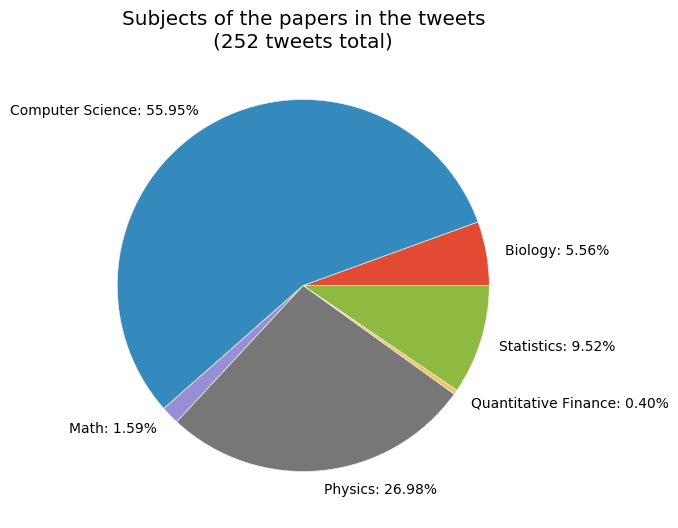

In [1]:
%matplotlib inline

import matplotlib
matplotlib.style.use('ggplot')

import pandas as pd
import os.path as op
from IPython.display import display,HTML

pd.set_option('display.max_colwidth', -1)

#Load and sort the data

D=pd.read_json(op.join('data','data.json'),convert_axes=False)
D.sort_values(by='Tweets', ascending=False, inplace=True)
d=D[['Title','Area','Link','Tweets']]

def linkformatter(link):
    return "<a href="+link+">" + link + "</a>"

print
display(HTML('<h1>10 most popular Arxiv papers on Twitter</h1>'))
print
display(HTML(d.head(10).to_html(index=False,escape=False,formatters={'Link': linkformatter})))

#count articles in every area
pie_data=d.pivot(columns='Area',values='Tweets').sum(axis=0)
pie_data.name=''

pie_data.index=pie_data.index+': '+((100*pie_data/pie_data.sum()).apply('{0:.2f}'.format))+ '%'

#plot piechart
pie=pie_data.plot.pie(figsize=(6,6),
                      title='Subjects of the papers in the tweets\n('+str(int(pie_data.sum()))+' tweets total)')

In [2]:
print
display(HTML('<h1>10 most popular physics papers'))
print
display(HTML(d[d.Area=='Physics'].head(10).to_html(index=False,escape=False,formatters={'Link': linkformatter})))

Title,Area,Link,Tweets
The Sun as a probe of Fundamental Physics and Cosmology,Physics,https://arxiv.org/abs/1701.03926,3
The role of cosmology in modern physics,Physics,https://arxiv.org/abs/1701.04469,3
Vacua Morghulis,Physics,https://arxiv.org/abs/1610.04564,2
TeV Solar Gamma Rays From Cosmic-Ray Interactions,Physics,https://arxiv.org/abs/1612.02420,2
Orientational Phase Transitions and the Assembly of Viral Capsids,Physics,https://arxiv.org/abs/1701.04452,2
Habitability properties of circumbinary planets,Physics,https://arxiv.org/abs/1701.03475,2
Optimization of synchronizability in multiplex networks by rewiring one layer,Physics,https://arxiv.org/abs/1701.04659,2
Disorder-free localization,Physics,https://arxiv.org/abs/1701.04748v1,2
Using impact exsolution to link the Chicxulub collision and Deccan volcanism,Physics,https://arxiv.org/abs/1701.04704,2
On the Detection of Extrasolar Moons and Rings,Physics,https://arxiv.org/abs/1701.04706,2


In [3]:
print
display(HTML('<h1>10 most popular statistics papers</h1><p>This is not a bug- on Arxiv, machine learning is a subcategory of statistics.</p>'))
print
display(HTML(d[d.Area=='Statistics'].head(10).to_html(index=False,escape=False,formatters={'Link': linkformatter})))

Title,Area,Link,Tweets
DyNet: The Dynamic Neural Network Toolkit,Statistics,https://arxiv.org/abs/1701.03980,6
Deep Probabilistic Programming,Statistics,https://arxiv.org/abs/1701.03757v1,4
checkmate: Fast Argument Checks for Defensive R Programming,Statistics,https://arxiv.org/abs/1701.04781,3
A Hierarchical Spatio-Temporal Analog Forecasting Model for Count Data,Statistics,https://arxiv.org/abs/1701.04485,3
Overfitting Bayesian Mixtures of Factor Analyzers with an Unknown Number of Components,Statistics,https://arxiv.org/abs/1701.04605v1,1
PUMA criterion = MODE criterion,Statistics,https://arxiv.org/abs/1701.04583v1,1
Adversarially Learned Inference,Statistics,https://arxiv.org/abs/1606.00704v2,1
Identifying the Optimal Integration Time in Hamiltonian Monte Carlo,Statistics,https://arxiv.org/abs/1601.00225,1
Generative Adversarial Networks,Statistics,https://arxiv.org/abs/1406.2661,1
"Edward: A library for probabilistic modeling, inference, and criticism",Statistics,https://arxiv.org/abs/1610.09787,1


In [4]:
print
display(HTML('<h1>10 most popular computer science papers'))
print
display(HTML(d[d.Area=='Computer Science'].head(10).to_html(index=False,escape=False,formatters={'Link': linkformatter})))

Title,Area,Link,Tweets
Automatic Knot Adjustment Using Dolphin Echolocation Algorithm for B-Spline Curve Approximation,Computer Science,https://arxiv.org/abs/1701.04383,47
A Tutorial on Principal Component Analysis,Computer Science,https://arxiv.org/abs/1404.1100,22
Deep Neural Networks are Easily Fooled: High Confidence Predictions for Unrecognizable Images,Computer Science,https://arxiv.org/abs/1412.1897v4,11
Image Generation and Editing with Variational Info Generative AdversarialNetworks,Computer Science,https://arxiv.org/abs/1701.04568,4
The Birth of Collective Memories: Analyzing Emerging Entities in Text Streams,Computer Science,https://arxiv.org/abs/1701.04039,3
Position Aided Beam Alignment for Millimeter Wave Backhaul Systems with Large Phased Arrays,Computer Science,https://arxiv.org/abs/1701.03291,2
The Incredible Shrinking Neural Network: New Perspectives on Learning Representations Through The Lens of Pruning,Computer Science,https://arxiv.org/abs/1701.04465v1,2
Human perception in computer vision,Computer Science,https://arxiv.org/abs/1701.04674,2
Minimally Naturalistic Artificial Intelligence,Computer Science,https://arxiv.org/abs/1701.03868,2
Agent-Agnostic Human-in-the-Loop Reinforcement Learning,Computer Science,https://arxiv.org/abs/1701.04079v1,2
